In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# uso pandas per creare il dataframe dal file .csv
df = pd.read_csv(".\\Bicocca\\Stage\\test.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [13]:
print(df.columns)



Index(['area', ' price'], dtype='object')


In [14]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['area', 'price'], dtype='object')


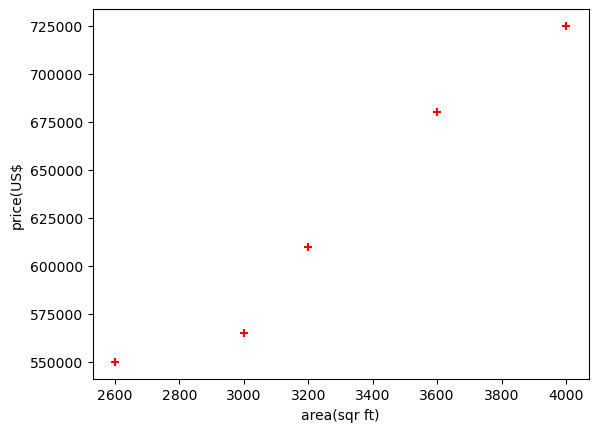

In [17]:
#stampiamo il grafico del dataset
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("price(US$)")
plt.scatter(df.area, df.price, color = "red", marker = "+")


In [18]:
# ha creato un oggetto per la linera regression, il dataset è suitable per questo modello
reg = linear_model.LinearRegression()
# fittig the data = in sostanza sto allenando il modello di regressione lineare con i dati del file .csv
# il primo argomento è un array 2D, il secondo è l'asse y
reg.fit(df[["area"]], df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
reg.predict([[3300]])

C:\Users\utente\miniconda3\envs\stageENV\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [27]:
# è un modo per non ottenere lo warning; si verificava perchè inserivi dati senza labels
reg.predict(pd.DataFrame({'area': [3300]}))


array([628715.75342466])

In [30]:
#il modello non ha fatto altro che calcolare il valore del coefficiente angolare e della quota della retta
# di regressione lineare, di modo che minimizzasse la minimum square error. Possiamo vedere questi valori
print(reg.coef_)
print(reg.intercept_)

[135.78767123]
180616.43835616432


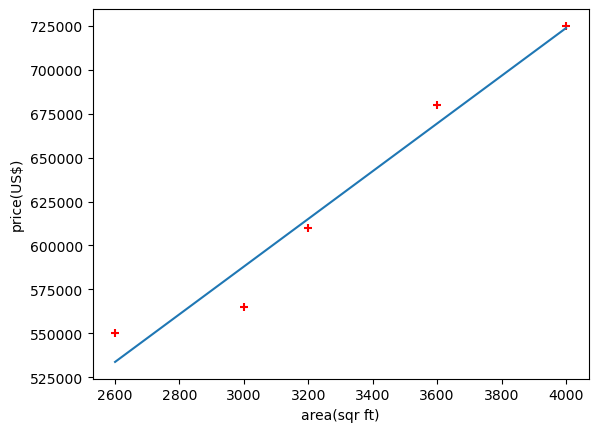

In [34]:
#possiamo disegnare la retta di regressione nello scatter plot!
m = reg.coef_
b = reg.intercept_
x = np.linspace(2600,4000)
y = m*x + b
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("price(US$)")
plt.scatter(df.area, df.price, color = "red", marker = "+")
plt.plot(x, y)
#possiamo creare la retta, e questa può essere usata per predictare i valori dei prezzi in base all'area.

In [ ]:
dfp = pd.read_csv(".\\Bicocca\\Stage\\predict.csv")
dfp

,area
0,1500
1,2300
2,3540
3,4120
4,4560
5,5490
6,3460
7,4750
8,2300
9,9000


In [38]:
reg.predict(dfp)


array([ 384297.94520548,  492928.08219178,  661304.79452055,
        740061.64383562,  799808.21917808,  926090.75342466,
        650441.78082192,  825607.87671233,  492928.08219178,
       1402705.47945205, 1348390.4109589 , 1144708.90410959])

In [39]:
#posso salvarli in una variabile e inserirli come nuova colonna nel dataframe originale

p = reg.predict(dfp)
dfp["prices"] = p


In [40]:
dfp

,area,prices
0,1500,3.842979e+05
1,2300,4.929281e+05
2,3540,6.613048e+05
3,4120,7.400616e+05
4,4560,7.998082e+05
5,5490,9.260908e+05
6,3460,6.504418e+05
7,4750,8.256079e+05
8,2300,4.929281e+05
9,9000,1.402705e+06


In [ ]:
#possiamo esportare i valori ottenuti
dfp.to_csv(".\\Bicocca\\Stage\\predict.csv", index = False)

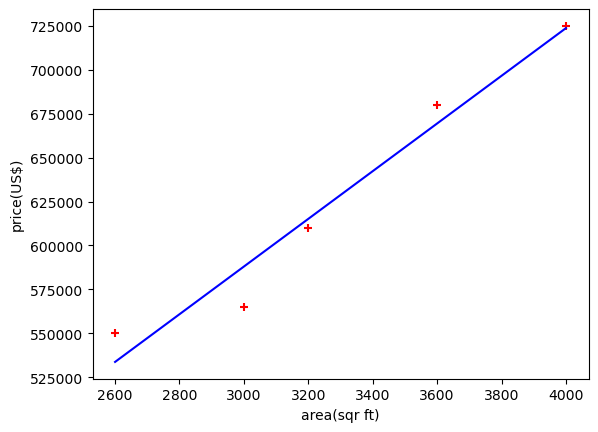

In [44]:
#un altro modo per realizzare il garfico di cui sopra
#possiamo disegnare la retta di regressione nello scatter plot!
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("price(US$)")
plt.scatter(df.area, df.price, color = "red", marker = "+")
#funziona perchè python quando disegna con plot, semplicemente collega fra loro i punti, e noi sappiamo
plt.plot(df.area, reg.predict(df[["area"]]), color = "blue")
# che i valori che otteniamo dalla previsione del modello addestrato stanno sulla retta di regressione lineare